In [24]:
import pandas as pd
import numpy as np

In [25]:
DOW30_df = pd.read_csv("DOW30_data.csv")

In [3]:
DOW30_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000,AMZN
1,2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,AMZN
2,2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800,AMZN
3,2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400,AMZN
4,2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,AMZN


In [4]:
DOW30_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03
mean,172.161745,173.715515,170.662513,172.242864,172.242864,1.271588e+07
std,104.484453,105.405833,103.600499,104.516918,104.516918,1.716042e+07
min,24.940001,25.120001,24.730000,24.900000,24.900000,4.167000e+05
25%,100.187498,101.145000,98.922501,100.245001,100.245001,3.083750e+06
50%,156.509995,157.679993,155.385002,156.404999,156.404999,5.992000e+06
75%,228.674999,230.709995,226.667496,228.794994,228.794994,1.407870e+07
max,551.349976,554.700012,547.099976,552.969971,552.969971,1.581542e+08


In [5]:
DOW30_df.Date

0       2023-01-03
1       2023-01-04
2       2023-01-05
3       2023-01-06
4       2023-01-09
           ...    
7495    2023-12-22
7496    2023-12-26
7497    2023-12-27
7498    2023-12-28
7499    2023-12-29
Name: Date, Length: 7500, dtype: object

In [6]:
DOW30_df.Date.describe()

count           7500
unique           250
top       2023-01-03
freq              30
Name: Date, dtype: object

In [7]:
DOW30_df.set_index("Date", inplace = True)

In [8]:
# Remove Indicies in Datafrmae, using dates as indicies
DOW30_df.head()

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000,AMZN
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,AMZN
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800,AMZN
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400,AMZN
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,AMZN


In [9]:
# check for null entries
DOW30_df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
ticker       0
dtype: int64

In [10]:
DOW30_df

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2023-01-03,85.459999,86.959999,84.209999,85.820000,85.820000,76706000,AMZN
2023-01-04,86.550003,86.980003,83.360001,85.139999,85.139999,68885100,AMZN
2023-01-05,85.330002,85.419998,83.070000,83.120003,83.120003,67930800,AMZN
2023-01-06,83.029999,86.400002,81.430000,86.080002,86.080002,83303400,AMZN
2023-01-09,87.459999,89.480003,87.080002,87.360001,87.360001,65266100,AMZN
...,...,...,...,...,...,...,...
2023-12-22,55.090000,55.660000,54.849998,55.119999,55.119999,2341900,DOW
2023-12-26,55.209999,55.895000,55.119999,55.709999,55.709999,2266200,DOW
2023-12-27,55.689999,55.858002,55.470001,55.709999,55.709999,2535300,DOW


In [31]:
# splitting the data, maintaining chronological order within each company
# training ~ 200 days, testing ~ 52 days per company
training_size = int(len(DOW30_df)*0.8)
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for ticker, group in DOW30_df.groupby('ticker'):
    training_size = int(len(group) * 0.8)
    df_train = pd.concat([df_train, group.iloc[:training_size]])
    df_test = pd.concat([df_test, group.iloc[training_size:]])
df_train.to_csv("DOW30_train.csv")
df_test.to_csv("DOW30_test.csv")

In [12]:
len(df_train[df_train["ticker"] == "AAPL"]) + len(df_test[df_test["ticker"] == "AAPL"])

250

In [13]:
# check for white noise
mean_close = DOW30_df['Close'].mean()
std_close = DOW30_df['Close'].std()
wn = np.random.normal(loc = mean_close, scale = std_close, size = len(DOW30_df))
DOW30_df["wn"] = wn
DOW30_df.describe()

,Open,High,Low,Close,Adj Close,Volume,wn
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000
mean,172.161745,173.715515,170.662513,172.242864,172.242864,1.271588e+07,172.591091
std,104.484453,105.405833,103.600499,104.516918,104.516918,1.716042e+07,103.970410
min,24.940001,25.120001,24.730000,24.900000,24.900000,4.167000e+05,-177.175606
25%,100.187498,101.145000,98.922501,100.245001,100.245001,3.083750e+06,101.683062
50%,156.509995,157.679993,155.385002,156.404999,156.404999,5.992000e+06,172.183776
75%,228.674999,230.709995,226.667496,228.794994,228.794994,1.407870e+07,243.662479
max,551.349976,554.700012,547.099976,552.969971,552.969971,1.581542e+08,549.514981


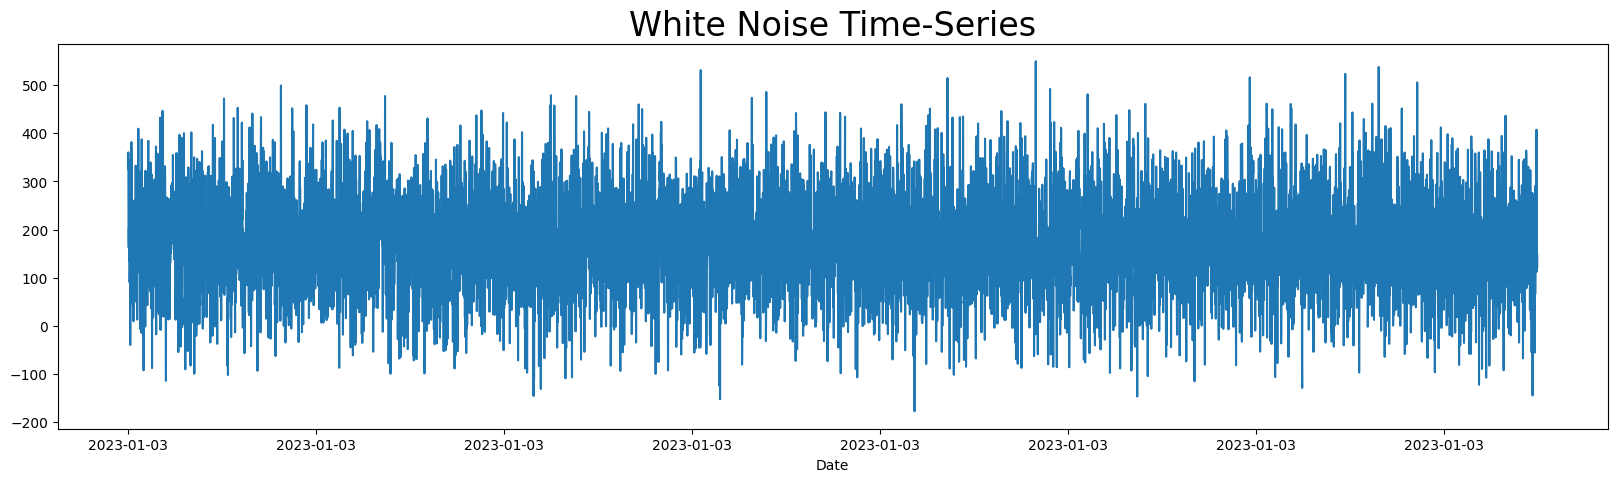

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import statsmodels.graphics.tsaplots as sgt 
#import statsmodels.tsa.stattools as sts 
#from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

DOW30_df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

In [15]:
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

In [16]:
stock_prices = DOW30_df[DOW30_df['ticker'] == 'AAPL']['Close']
adf_result = sts.adfuller(stock_prices)
adf_result

(-2.6034730008848097,
 0.09228159120356583,
 0,
 249,
 {'1%': -3.4568881317725864,
  '5%': -2.8732185133016057,
  '10%': -2.5729936189738876},
 1015.6235657930902)

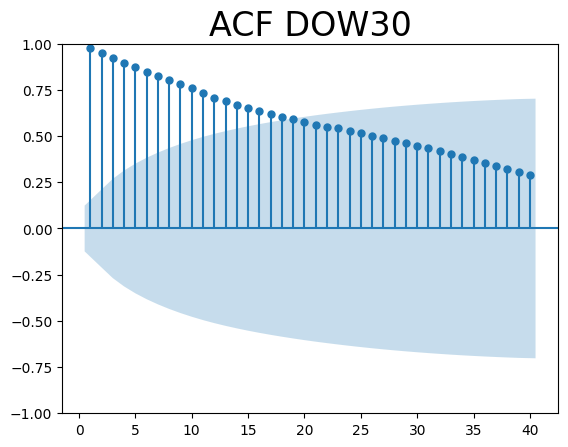

In [32]:
 # ACF
sgt.plot_acf(DOW30_df[DOW30_df['ticker'] == 'AAPL'].Close , lags = 40, zero = False)
plt.title("ACF DOW30", size = 24)
plt.show()